<a href="https://colab.research.google.com/github/JoshuaHaga/Covid_19_sprint_1_buildwk/blob/master/Covid_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Must run cell below to load data ###

In [14]:
import os
os.environ['KAGGLE_USERNAME'] = "joshuahaga" 
os.environ['KAGGLE_KEY'] = "87df8709f871bde773c95883204fc54f" 
!kaggle datasets download -d sudalairajkumar/covid19-in-usa
!unzip '/content/covid19-in-usa.zip'

  0% 0.00/4.52M [00:00<?, ?B/s]
100% 4.52M/4.52M [00:00<00:00, 74.4MB/s]
Archive:  /content/covid19-in-usa.zip
  inflating: us_counties_covid19_daily.csv  
  inflating: us_covid19_daily.csv    
  inflating: us_states_covid19_daily.csv  


##COVID-19 in USA

#Context
Data is obtained from COVID-19 Tracking project and NYTimes. Sincere thanks to them for making it available to the public.

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from 50 US states and the District of Columbia at daily level.

The Original Dataset can be found on kaggle by clicking [here](https://www.kaggle.com/sudalairajkumar/covid19-in-usa).

#Index
All datasets, functions, libraries, and variables used throughout the notebook  will be outlined here. 

###Libraries

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy import linalg

###Datasets

In [119]:
### These 3 dataframes come from the kaggle dataset 'COVID-19 in USA'
counties = pd.read_csv('/content/us_counties_covid19_daily.csv')
states   = pd.read_csv('https://api.covidtracking.com/v1/states/daily.csv')
us       = pd.read_csv('/content/us_covid19_daily.csv')

###Functions

In [120]:
### Checks for null values. 
def null_check(dataframe):
    val = dataframe.isnull().sum()
    val_sum = val.sum()
    if val_sum == 0:
      print('Zero null values.')
    else:
      print(val)

### Finds null counts, shape, describes and previews data set. 
def explore(dataframe):
  print(null_check(dataframe))
  print('Shape: ', dataframe.shape)
  print(dataframe.describe())
  return dataframe.head()

### Creates a list from column names
def col_list(dataframe):
  val_counts = dataframe.value_counts()
  val_as_pd  = pd.DataFrame(val_counts).T
  val_list   = val_as_pd.columns.tolist()
  return val_list

### Calculates daily averages of new cases for counties. Outputs as pandas df
def cnty_daily_avg(dataframe, countyname):
  county = dataframe[dataframe['county']==countyname]
  mean   = county['cases'].mean()
  avg    = mean/len(county)
  dat    = [countyname,avg]
  return dat

###Applies county daily average function across dataframe from a list. 
def daily_df(dataframe, countylist,):
  data_list = []
  for i in countylist:
    data_list.append(cnty_daily_avg(dataframe, i)) 
  return pd.DataFrame(data_list, columns=['county','daily_avg'])

###Creates a dataframe of daily averages for any state. 
def prep_counties(df, state):
  state = df[df['state']==state]
  county_names = col_list(state['county']) 
  ste = state[state['county']=='Baltimore']
  state_daily_avg = daily_df(state, county_names,)
  return pd.DataFrame(state_daily_avg, columns=['county','daily_new_avg'])

###Functoin to create percent of positive cases
def pos_to_neg(dataframe):
  for i in dataframe['positive']:
    return dataframe['positive']/dataframe['negative']


###Variables

In [121]:

################################################################################
###########################<<---- Maryland ---->>###############################
################################################################################
### md_counties                  #< - - - - - - - - - - - All Counties in MD ###
### md_counties_vc               #< - - - - - Value counts of counties in MD ###
### md_county_names              #< - - - - - - - - - List of counties in MD ###
### baltimore_daily_average      #< - - - - Average of new cases daily in MD ###
### md_daily_avg                 #< - - - This is a dataframe of the average ###
###                              #      number of new cases per day for each ###
###                              #      county in the state of MD.           ###
### md_percentage_pos            #< - - - This is the total percentage of all###
###                              #        tests that were positive           ###

# Data Exploration

### Introduction:
  Here I will. be doing some basic data explorations of the sets listed in the index. I will clean data here and begin to draw conclusions to be processed later. Findings will be collected and expounded upon at the end of this section. 

##Counties 
Here I am going to explore the counties data set and see what all I can find. Since I live in MD, I am going to first take a look at the number of positive cases since the start of data collection

In [122]:
### Doing some initial exploration in the counties dataset ###
explore(counties)

date         0
county       0
state        0
fips      4444
cases        0
deaths       0
dtype: int64
None
Shape:  (460109, 6)
                fips          cases         deaths
count  455665.000000  460109.000000  460109.000000
mean    31064.480779     775.658540      32.883402
std     16227.027828    5326.808852     389.618385
min      1001.000000       0.000000       0.000000
25%     18151.000000      11.000000       0.000000
50%     29173.000000      55.000000       1.000000
75%     46081.000000     266.000000       7.000000
max     78030.000000  236534.000000   23646.000000


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [123]:
#counties['state'].mean()

In [124]:
md_counties = counties[counties['state']=='Maryland']
md_counties

,date,county,state,fips,cases,deaths
555,2020-03-05,Montgomery,Maryland,24031.0,3,0
615,2020-03-06,Montgomery,Maryland,24031.0,3,0
700,2020-03-07,Montgomery,Maryland,24031.0,3,0
801,2020-03-08,Harford,Maryland,24025.0,1,0
802,2020-03-08,Montgomery,Maryland,24031.0,4,0
...,...,...,...,...,...,...
458098,2020-08-22,Talbot,Maryland,24041.0,436,4
458099,2020-08-22,Unknown,Maryland,NaN,0,13
458100,2020-08-22,Washington,Maryland,24043.0,1207,32
458101,2020-08-22,Wicomico,Maryland,24045.0,1442,46


In [125]:
### Checking fo null data 
null_check(md_counties)

date        0
county      0
state       0
fips      132
cases       0
deaths      0
dtype: int64


In [126]:
counties['fips'] = counties['fips'].fillna(0)

In [127]:
##### Counts of counties shows pretty even sampling across counties. 
md_counties_vc = md_counties['county'].value_counts()
md_counties_vc

Montgomery         171
Harford            168
Prince George's    167
Baltimore          165
Charles            163
Anne Arundel       163
Carroll            162
Baltimore city     161
Howard             161
Talbot             160
Frederick          160
Calvert            157
Wicomico           157
Worcester          156
Somerset           155
Caroline           155
Washington         155
Cecil              154
St. Mary's         154
Garrett            153
Queen Anne's       153
Kent               151
Dorchester         144
Allegany           143
Unknown            132
Name: county, dtype: int64

In [128]:
#Creating a list of county names in md
mdcounty_list = pd.DataFrame(md_counties_vc)
mdcounty_list = mdcounty_list.T
mdcounty_list

,Montgomery,Harford,Prince George's,Baltimore,Charles,Anne Arundel,Carroll,Baltimore city,Howard,Talbot,Frederick,Calvert,Wicomico,Worcester,Somerset,Caroline,Washington,Cecil,St. Mary's,Garrett,Queen Anne's,Kent,Dorchester,Allegany,Unknown
county,171,168,167,165,163,163,162,161,161,160,160,157,157,156,155,155,155,154,154,153,153,151,144,143,132


In [129]:
md_county_names = mdcounty_list.columns.tolist()
md_county_names

['Montgomery',
 'Harford',
 "Prince George's",
 'Baltimore',
 'Charles',
 'Anne Arundel',
 'Carroll',
 'Baltimore city',
 'Howard',
 'Talbot',
 'Frederick',
 'Calvert',
 'Wicomico',
 'Worcester',
 'Somerset',
 'Caroline',
 'Washington',
 'Cecil',
 "St. Mary's",
 'Garrett',
 "Queen Anne's",
 'Kent',
 'Dorchester',
 'Allegany',
 'Unknown']

In [130]:
#The whole process as a function to speed up later states. 
def col_list(dataframe):
  val_counts = dataframe.value_counts()
  val_as_pd  = pd.DataFrame(val_counts).T
  val_list   = val_as_pd.columns.tolist()
  return val_list

In [131]:
md_county_names = col_list(md_counties['county']) ###<<< - - - - Testing listing function
md_county_names

['Montgomery',
 'Harford',
 "Prince George's",
 'Baltimore',
 'Charles',
 'Anne Arundel',
 'Carroll',
 'Baltimore city',
 'Howard',
 'Talbot',
 'Frederick',
 'Calvert',
 'Wicomico',
 'Worcester',
 'Somerset',
 'Caroline',
 'Washington',
 'Cecil',
 "St. Mary's",
 'Garrett',
 "Queen Anne's",
 'Kent',
 'Dorchester',
 'Allegany',
 'Unknown']

In [132]:
#Finding average cases per county during the entire time of recording
#Starting with Baltimore

In [133]:
baltimore = md_counties[md_counties['county']=='Baltimore']
baltimore

,date,county,state,fips,cases,deaths
1249,2020-03-11,Baltimore,Maryland,24005.0,1,0
1467,2020-03-12,Baltimore,Maryland,24005.0,1,0
1745,2020-03-13,Baltimore,Maryland,24005.0,2,0
2085,2020-03-14,Baltimore,Maryland,24005.0,3,0
2484,2020-03-15,Baltimore,Maryland,24005.0,3,0
...,...,...,...,...,...,...
445170,2020-08-18,Baltimore,Maryland,24005.0,14139,576
448396,2020-08-19,Baltimore,Maryland,24005.0,14203,581
451624,2020-08-20,Baltimore,Maryland,24005.0,14350,582
454852,2020-08-21,Baltimore,Maryland,24005.0,14494,584


In [134]:
balt_mean = baltimore['cases'].mean()

In [135]:
baltimore_daily_average = balt_mean/len(baltimore)
baltimore_daily_average

36.568044077134985

In [136]:
### Create function to do this faster for later 

def cnty_daily_avg(dataframe, countyname):
  county = dataframe[dataframe['county']==countyname]
  mean   = county['cases'].mean()
  avg    = mean/len(county)
  dat    = [countyname,avg]
  return dat


In [137]:
harf_avg = cnty_daily_avg(md_counties, 'Harford')
harf_avg

['Harford', 5.126948696145125]

In [138]:
balt_avg = cnty_daily_avg(md_counties, 'Baltimore') #< - - - thank god I dont have to do this hundreds of times manually
balt_avg

['Baltimore', 36.568044077134985]

In [139]:
#Apply function to all counties and create a dataframe
data_list = []

In [140]:
def daily_df(dataframe, county,):
  data_list = []
  for i in county:
    data_list.append(cnty_daily_avg(dataframe, i)) 
  return data_list

In [141]:
md_daily_avg = daily_df(md_counties, md_county_names)
md_daily_avg

[['Montgomery', 55.878937108854004],
 ['Harford', 5.126948696145125],
 ["Prince George's", 77.11431030155258],
 ['Baltimore', 36.568044077134985],
 ['Charles', 6.347698445556851],
 ['Anne Arundel', 22.468628853174753],
 ['Carroll', 5.07384545038866],
 ['Baltimore city', 35.48759692913082],
 ['Howard', 11.804251379190617],
 ['Talbot', 0.8522265625],
 ['Frederick', 10.9328515625],
 ['Calvert', 2.115217655888677],
 ['Wicomico', 4.99614588827133],
 ['Worcester', 1.646449704142012],
 ['Somerset', 0.4478251821019771],
 ['Caroline', 1.5032258064516129],
 ['Washington', 3.266888657648283],
 ['Cecil', 2.423005565862709],
 ["St. Mary's", 3.149645808736718],
 ['Garrett', 0.11469947456106627],
 ["Queen Anne's", 1.2546883677218164],
 ['Kent', 0.9905267312837157],
 ['Dorchester', 1.205536265432099],
 ['Allegany', 1.2566384664286763],
 ['Unknown', 0.02255509641873278]]

In [142]:
###Doing everything we did above with one script! Boo Yah!
def prep_counties(df, state):
  state = df[df['state']==state]
  county_names = col_list(state['county']) 
  ste = state[state['county']=='Baltimore']
  state_daily_avg = daily_df(state, county_names,)
  return pd.DataFrame(state_daily_avg, columns=['county','daily_avg'])

In [143]:
virginia = prep_counties(counties, 'Virginia')
virginia

,county,daily_avg
0,Fairfax,52.056581
1,Virginia Beach city,8.535408
2,Loudoun,15.191029
3,Arlington,10.493333
4,James City,1.603473
...,...,...
129,Covington city,0.059897
130,Dickenson,0.275303
131,Bland,0.155503
132,Bath,0.066635


In [144]:
#Lets get a list of states we have data on and apply this to all of our data. 
states_count = col_list(counties['state'])
states_count

['Texas',
 'Georgia',
 'Virginia',
 'Kentucky',
 'Missouri',
 'North Carolina',
 'Illinois',
 'Tennessee',
 'Iowa',
 'Indiana',
 'Ohio',
 'Kansas',
 'Minnesota',
 'Mississippi',
 'Michigan',
 'Arkansas',
 'Oklahoma',
 'Wisconsin',
 'Florida',
 'Nebraska',
 'Pennsylvania',
 'Alabama',
 'Louisiana',
 'Colorado',
 'New York',
 'California',
 'Puerto Rico',
 'South Dakota',
 'West Virginia',
 'South Carolina',
 'North Dakota',
 'Washington',
 'Montana',
 'Idaho',
 'Oregon',
 'New Mexico',
 'Utah',
 'Maryland',
 'New Jersey',
 'Wyoming',
 'Alaska',
 'Maine',
 'Massachusetts',
 'Arizona',
 'Vermont',
 'Nevada',
 'New Hampshire',
 'Connecticut',
 'Rhode Island',
 'Hawaii',
 'Delaware',
 'Virgin Islands',
 'Northern Mariana Islands',
 'District of Columbia',
 'Guam']

In [145]:
def counties_daily_avg(dataframe, state_list):
  data_df = []
  for i in state_list :
    data_df.append(prep_counties(dataframe, i)) 
  return data_df

##States

In [163]:
states

,date,state,positive,negative,prcnt_pos,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200824,AK,5628.0,324875.0,0.017324,NaN,43.0,NaN,NaN,NaN,8.0,NaN,1861.0,A,8/24/2020 03:59,2020-08-24T03:59:00Z,08/23 23:59,32.0,NaN,2020-08-24T03:59:00Z,330503.0,5221.0,324954.0,5628.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,70,2993,330503,330503.0,3063,330503,0,0,54865e3eaef9af79f98d4ca570197186492760a0,0,0,0,0,0,NaN
1,20200824,AL,116710.0,806609.0,0.144692,NaN,1149.0,13793.0,NaN,1391.0,NaN,754.0,44684.0,B,8/24/2020 11:00,2020-08-24T11:00:00Z,08/24 07:00,2024.0,13793.0,2020-08-24T11:00:00Z,916364.0,NaN,NaN,110769.0,1950.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1650,0,923319,923319.0,1650,923319,11,291,2fe1d500d143b2a7f02117934c2c53d0b2648560,0,0,0,0,0,NaN
2,20200824,AR,56894.0,616810.0,0.092239,NaN,466.0,3962.0,NaN,NaN,108.0,507.0,50689.0,A,8/24/2020 14:36,2020-08-24T14:36:00Z,08/24 10:36,696.0,3962.0,2020-08-24T14:36:00Z,673704.0,NaN,616810.0,56894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10358.0,NaN,5,320,7684,673704,673704.0,8004,673704,9,42,51dc585c49ed43ee35e01760e30b6b7aa792afe6,0,0,0,0,0,NaN
3,20200824,AS,0.0,1514.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,8/15/2020 00:00,2020-08-15T00:00:00Z,08/14 20:00,0.0,NaN,2020-08-15T00:00:00Z,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1514,1514.0,0,1514,0,0,c878baea61754904c3c233d78e523723e2f4a8e1,0,0,0,0,0,NaN
4,20200824,AZ,198414.0,958808.0,0.206938,NaN,908.0,21219.0,345.0,NaN,176.0,NaN,29341.0,A+,8/24/2020 00:00,2020-08-24T00:00:00Z,08/23 20:00,4771.0,21219.0,2020-08-24T00:00:00Z,1155629.0,NaN,NaN,196821.0,4514.0,257.0,NaN,NaN,260739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,311,6042,1157222,1157222.0,6353,1157222,0,-22,a3a22a4967b6ca06481f5aa38b1c59235db23f87,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9668,20200126,WA,2.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2.0,0,2,0,0,6651e166d96764ff1a625db3688b9c547326bf8c,0,0,0,0,0,NaN
9669,20200125,WA,2.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2.0,0,2,0,0,32c45cbd5727e7f9570593bc23b0abb98c1efa14,0,0,0,0,0,NaN
9670,20200124,WA,2.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2.0,0,2,0,0,41b25b21697a9a75a314694abd65a010008238a0,0,0,0,0,0,NaN
9671,20200123,WA,2.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2.0,0,2,0,0,0dd03499910fd51f8661f17e97e6ef598b0c3609,0,0,0,0,0,NaN


In [164]:
md = states[states['state'] == 'MD']

In [166]:
fix = md[md['date'] < 20200409 ]
fix.tail(35)

,date,state,positive,negative,prcnt_pos,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
7750,20200408,MD,5529.0,32933.0,0.167886,NaN,NaN,1210.0,NaN,NaN,NaN,NaN,365.0,A,4/8/2020 10:00,2020-04-08T10:00:00Z,04/08 06:00,191.0,1210.0,2020-04-08T10:00:00Z,NaN,NaN,NaN,5529.0,181.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1158,5677,38462,38462.0,6835,38462,31,104,170e65ef147ac94da0cbb7ea37745492bded6e91,0,0,0,0,0,NaN
7806,20200407,MD,4371.0,27256.0,0.160368,NaN,NaN,1106.0,NaN,NaN,NaN,NaN,288.0,A,4/7/2020 10:00,2020-04-07T10:00:00Z,04/07 06:00,160.0,1106.0,2020-04-07T10:00:00Z,NaN,NaN,NaN,4371.0,152.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,326,1684,31627,31627.0,2010,31627,22,47,1a692975801fef32f9898ca7ec80e9805cafc182,0,0,0,0,0,NaN
7862,20200406,MD,4045.0,25572.0,0.158181,NaN,NaN,1059.0,NaN,NaN,NaN,NaN,184.0,A,4/6/2020 10:00,2020-04-06T10:00:00Z,04/06 06:00,138.0,1059.0,2020-04-06T10:00:00Z,NaN,NaN,NaN,4045.0,131.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,436,844,29617,29617.0,1280,29617,16,123,84243e2f762aed48cbfffe7c29aa88dabb99114f,0,0,0,0,0,NaN
7918,20200405,MD,3609.0,24728.0,0.145948,NaN,NaN,936.0,NaN,NaN,NaN,NaN,159.0,A,4/5/2020 10:00,2020-04-05T10:00:00Z,04/05 06:00,122.0,936.0,2020-04-05T10:00:00Z,NaN,NaN,NaN,3609.0,115.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,484,2243,28337,28337.0,2727,28337,21,115,bb126a3c16c5fb325fb54958686e0aaa66f03a4e,0,0,0,0,0,NaN
7974,20200404,MD,3125.0,22485.0,0.138982,NaN,NaN,821.0,NaN,NaN,NaN,NaN,159.0,A,4/4/2020 10:00,2020-04-04T10:00:00Z,04/04 06:00,101.0,821.0,2020-04-04T10:00:00Z,NaN,NaN,NaN,3125.0,94.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,367,1553,25610,25610.0,1920,25610,17,157,bc5beeeb6d0f03dd145f3885246ed73ac8a5f632,0,0,0,0,0,NaN
8030,20200403,MD,2758.0,20932.0,0.131760,NaN,NaN,664.0,NaN,NaN,NaN,NaN,159.0,A,4/3/2020 10:00,2020-04-03T10:00:00Z,04/03 06:00,84.0,664.0,2020-04-03T10:00:00Z,NaN,NaN,NaN,2758.0,79.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,427,2042,23690,23690.0,2469,23690,20,82,7e67e6503962dc5925c7638a66136f0a20b6b766,0,0,0,0,0,NaN
8086,20200402,MD,2331.0,18890.0,0.123399,NaN,NaN,582.0,NaN,NaN,NaN,NaN,81.0,A,4/2/2020 10:00,2020-04-02T10:00:00Z,04/02 06:00,64.0,582.0,2020-04-02T10:00:00Z,NaN,NaN,NaN,2331.0,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,346,1657,21221,21221.0,2003,21221,12,60,510e5fe0dc8177660d9f45030f4b96b71417cf8d,0,0,0,0,0,NaN
8142,20200401,MD,1985.0,17233.0,0.115186,NaN,NaN,522.0,NaN,NaN,NaN,NaN,NaN,A,4/1/2020 10:00,2020-04-01T10:00:00Z,04/01 06:00,52.0,522.0,2020-04-01T10:00:00Z,NaN,NaN,NaN,1985.0,50.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,325,2365,19218,19218.0,2690,19218,9,93,9b864bc6403e9948f9f4d0d391dd769f63c59a11,0,0,0,0,0,NaN
8198,20200331,MD,1660.0,14868.0,0.111649,NaN,NaN,429.0,NaN,NaN,NaN,NaN,NaN,A,3/31/2020 10:00,2020-03-31T10:00:00Z,03/31 06:00,43.0,429.0,2020-03-31T10:00:00Z,NaN,NaN,NaN,1660.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,247,1552,16528,16528.0,1799,16528,8,76,4d6f9809802ed926ae692f89a1be1497c1398a1f,0,0,0,0,0,NaN
8254,20200330,MD,1413.0,13316.0,0.106113,NaN,NaN,353.0,NaN,NaN,NaN,NaN,NaN,A,3/30/2020 10:00,2020-03-30T10:00:00Z,03/30 06:00,35.0

In [149]:
#Replace missing negative values
def datareplace(dataframe):
  data_list = []
  for cell in dataframe['positive']:
    data_list.append(cell*10.31,)
  return data_list


In [167]:
md['negative'].iloc[125:160] = datareplace(fix)
md['negative'] = md['negative'].apply(np.ceil)
md.tail(30)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,date,state,positive,negative,prcnt_pos,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
8030,20200403,MD,2758.0,1959.0,0.131760,NaN,NaN,664.0,NaN,NaN,NaN,NaN,159.0,A,4/3/2020 10:00,2020-04-03T10:00:00Z,04/03 06:00,84.0,664.0,2020-04-03T10:00:00Z,NaN,NaN,NaN,2758.0,79.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,427,2042,23690,23690.0,2469,23690,20,82,7e67e6503962dc5925c7638a66136f0a20b6b766,0,0,0,0,0,NaN
8086,20200402,MD,2331.0,1537.0,0.123399,NaN,NaN,582.0,NaN,NaN,NaN,NaN,81.0,A,4/2/2020 10:00,2020-04-02T10:00:00Z,04/02 06:00,64.0,582.0,2020-04-02T10:00:00Z,NaN,NaN,NaN,2331.0,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,346,1657,21221,21221.0,2003,21221,12,60,510e5fe0dc8177660d9f45030f4b96b71417cf8d,0,0,0,0,0,NaN
8142,20200401,MD,1985.0,1104.0,0.115186,NaN,NaN,522.0,NaN,NaN,NaN,NaN,NaN,A,4/1/2020 10:00,2020-04-01T10:00:00Z,04/01 06:00,52.0,522.0,2020-04-01T10:00:00Z,NaN,NaN,NaN,1985.0,50.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,325,2365,19218,19218.0,2690,19218,9,93,9b864bc6403e9948f9f4d0d391dd769f63c59a11,0,0,0,0,0,NaN
8198,20200331,MD,1660.0,877.0,0.111649,NaN,NaN,429.0,NaN,NaN,NaN,NaN,NaN,A,3/31/2020 10:00,2020-03-31T10:00:00Z,03/31 06:00,43.0,429.0,2020-03-31T10:00:00Z,NaN,NaN,NaN,1660.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,247,1552,16528,16528.0,1799,16528,8,76,4d6f9809802ed926ae692f89a1be1497c1398a1f,0,0,0,0,0,NaN
8254,20200330,MD,1413.0,588.0,0.106113,NaN,NaN,353.0,NaN,NaN,NaN,NaN,NaN,A,3/30/2020 10:00,2020-03-30T10:00:00Z,03/30 06:00,35.0,353.0,2020-03-30T10:00:00Z,NaN,NaN,NaN,1413.0,34.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,174,962,14729,14729.0,1136,14729,11,76,a559c4ba9408c128f72b55174605d472687503bc,0,0,0,0,0,NaN
8310,20200329,MD,1239.0,382.0,0.100291,NaN,NaN,277.0,NaN,NaN,NaN,NaN,NaN,D,3/29/2020 10:00,2020-03-29T10:00:00Z,03/29 06:00,24.0,277.0,2020-03-29T10:00:00Z,NaN,NaN,NaN,1239.0,23.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,247,838,13593,13593.0,1085,13593,7,51,34cc80fa45e7fb927de9da26bb7f30c8fd516062,0,0,0,0,0,NaN
8366,20200328,MD,992.0,320.0,0.086141,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,D,3/28/2020 10:00,2020-03-28T10:00:00Z,03/28 06:00,17.0,226.0,2020-03-28T10:00:00Z,NaN,NaN,NaN,992.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,218,11422,12508,12508.0,11640,12508,7,53,cdb149e410a4636b857347429da5c8f3ca7b5a80,0,0,0,0,0,NaN
8422,20200327,MD,774.0,269.0,8.234043,NaN,NaN,173.0,NaN,NaN,NaN,NaN,25.0,D,3/27/2020 10:00,2020-03-27T10:00:00Z,03/27 06:00,10.0,173.0,2020-03-27T10:00:00Z,NaN,NaN,NaN,774.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,194,0,868,868.0,194,868,3,41,fba172642400a4829ac3f3fcf619411e45e36059,0,0,0,0,0,NaN
8478,20200326,MD,580.0,176.0,6.170213,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,D,3/26/2020 10:00,2020-03-26T10:00:00Z,03/26 06:00,7.0,132.0,2020-03-26T10:00:00Z,NaN,NaN,NaN,580.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,157,0,674,674.0,157,674,2,132,57d3ec4d3283b64d2ef748c4d80cebe7bb62a1b7,0,0,0,0,0,NaN
8534,20200325,MD,423.0,124.0,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/25/2020 10:00,2020-03-25T10:00:00Z,03/25 06:00,5.0,NaN,2020-03-25T10:00:00Z,NaN,NaN,NaN,423.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [151]:
#Functoin to create percent of positive cases
def pos_to_neg(dataframe):
  for i in dataframe['positive']:
    return dataframe['positive']/dataframe['negative']


In [152]:
##Create columns of percentage of positive results
percent_pos = pos_to_neg(states)
print(percent_pos.isnull().value_counts())
percent_pos

False    9487
True      186
dtype: int64


0       0.017324
1       0.144692
2       0.092239
3       0.000000
4       0.206938
          ...   
9668         inf
9669         inf
9670         inf
9671         inf
9672         inf
Length: 9673, dtype: float64

In [153]:
states.insert(4, 'prcnt_pos', percent_pos)

In [154]:
states['prcnt_pos'] =  states['prcnt_pos'].replace(np.inf, 0,)


In [168]:
#Finish fixing MD
percent_pos_md = pos_to_neg(md)
percent_pos_md
md.insert(4, 'prcnt_pos', percent_pos_md)
md['prcnt_pos'] =  md['prcnt_pos'].replace(np.inf, 0,)

ValueError: ignored

In [169]:
test = md[md['prcnt_pos']>0.3]
test


,date,state,positive,negative,prcnt_pos,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
8422,20200327,MD,774.0,269.0,8.234043,NaN,NaN,173.0,NaN,NaN,NaN,NaN,25.0,D,3/27/2020 10:00,2020-03-27T10:00:00Z,03/27 06:00,10.0,173.0,2020-03-27T10:00:00Z,NaN,NaN,NaN,774.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,194,0,868,868.0,194,868,3,41,fba172642400a4829ac3f3fcf619411e45e36059,0,0,0,0,0,NaN
8478,20200326,MD,580.0,176.0,6.170213,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,D,3/26/2020 10:00,2020-03-26T10:00:00Z,03/26 06:00,7.0,132.0,2020-03-26T10:00:00Z,NaN,NaN,NaN,580.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,157,0,674,674.0,157,674,2,132,57d3ec4d3283b64d2ef748c4d80cebe7bb62a1b7,0,0,0,0,0,NaN
8534,20200325,MD,423.0,124.0,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/25/2020 10:00,2020-03-25T10:00:00Z,03/25 06:00,5.0,NaN,2020-03-25T10:00:00Z,NaN,NaN,NaN,423.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,74,0,517,517.0,74,517,0,0,ccc9cf35128f89446ba9118bd7944dfa34773e41,0,0,0,0,0,NaN
8590,20200324,MD,349.0,93.0,3.712766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/24/2020 10:00,2020-03-24T10:00:00Z,03/24 06:00,5.0,NaN,2020-03-24T10:00:00Z,NaN,NaN,NaN,349.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,61,0,443,443.0,61,443,1,0,0121f56b5ba2a61656434eaf06fb06c4a532ef99,0,0,0,0,0,NaN
8646,20200323,MD,288.0,62.0,3.063830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/23/2020 10:00,2020-03-23T10:00:00Z,03/23 06:00,4.0,NaN,2020-03-23T10:00:00Z,NaN,NaN,NaN,288.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,44,0,382,382.0,44,382,0,0,b385fc62bb6030c696f70d5622b6c640c2525d57,0,0,0,0,0,NaN
8702,20200322,MD,244.0,52.0,2.595745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/22/2020 10:00,2020-03-22T10:00:00Z,03/22 06:00,4.0,NaN,2020-03-22T10:00:00Z,NaN,NaN,NaN,244.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,54,0,338,338.0,54,338,1,0,86a32923bcd24b1dacdd1e6c41b1471c18a1ed37,0,0,0,0,0,NaN
8758,20200321,MD,190.0,31.0,2.021277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/21/2020 10:00,2020-03-21T10:00:00Z,03/21 06:00,3.0,NaN,2020-03-21T10:00:00Z,NaN,NaN,NaN,190.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,41,0,284,284.0,41,284,0,0,7b862050bbdf5ff5ac4f21286eb292cc7f896bcf,0,0,0,0,0,NaN
8814,20200320,MD,149.0,31.0,1.585106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/20/2020 10:00,2020-03-20T10:00:00Z,03/20 06:00,3.0,NaN,2020-03-20T10:00:00Z,NaN,NaN,NaN,149.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,42,0,243,243.0,42,243,1,0,9fa93a884d37bff50d6fdccbd675814acb4505d8,0,0,0,0,0,NaN
8870,20200319,MD,107.0,31.0,1.138298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/19/2020 10:00,2020-03-19T10:00:00Z,03/19 06:00,2.0,NaN,2020-03-19T10:00:00Z,NaN,NaN,NaN,107.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,22,0,201,201.0,22,201,0,0,cba4e305a8a368a8c910a576f0a4ac7a9bf64c4a,0,0,0,0,0,NaN
8926,20200318,MD,85.0,0.0,0.904255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/18/2020 10:00,2020-03-18T10:00:00Z,03/18 06:00,2.0,NaN,2020-03-18T10:00:00Z,NaN,NaN,NaN,85.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,28,0,179,179.0,28,179,2,0,bcee52d79c017fd206b26b82f9573ed98fd21ea2,0,0,0,0,0,NaN


In [170]:
pa = states[states['state'] == 'PA']
va = states[states['state'] == 'VA']
wv = states[states['state'] == 'WV']
fl = states[states['state'] == 'FL']
dc = states[states['state'] == 'DC']


In [158]:
pa_mean = pa['prcnt_pos'].mean()
va_mean = va['prcnt_pos'].mean()
wv_mean = wv['prcnt_pos'].mean()
fl_mean = fl['prcnt_pos'].mean()
md_mean = md['prcnt_pos'].mean()
dc_mean = dc['prcnt_pos'].mean()
print(pa_mean, va_mean,fl_mean,md_mean,dc_mean)

0.16296846516609853 0.12960971851876435 0.10995074273805241 0.5043414118501048 0.16529984731150152


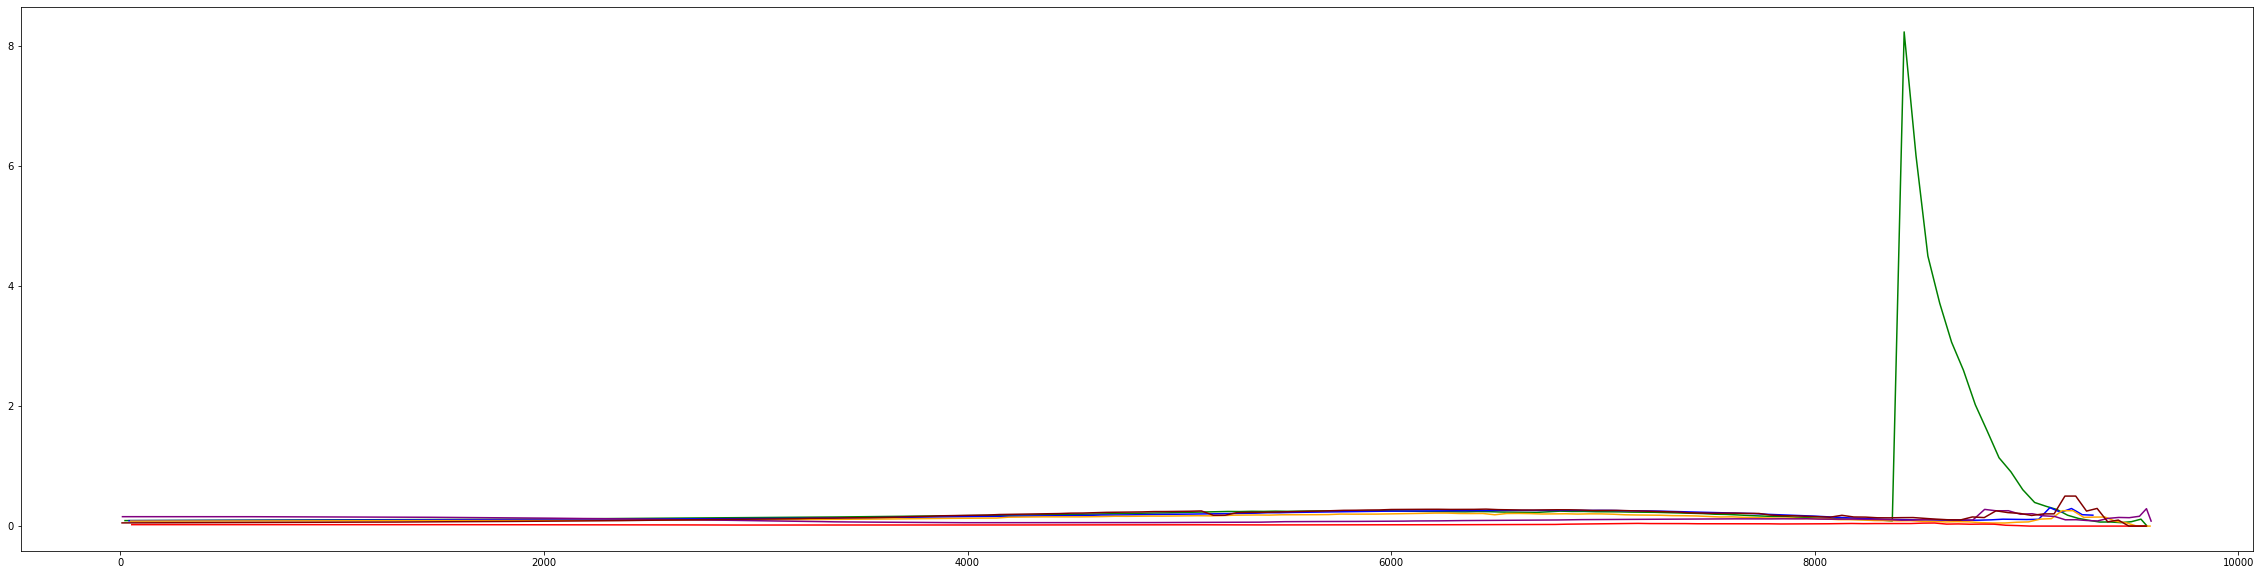

In [171]:
md['prcnt_pos'].plot(figsize=(40,10), color="green")
pa['prcnt_pos'].plot(figsize=(40,10), color="blue")
va['prcnt_pos'].plot(figsize=(40,10), color="orange")
wv['prcnt_pos'].plot(figsize=(40,10), color="red")
fl['prcnt_pos'].plot(figsize=(40,10), color="purple")
dc['prcnt_pos'].plot(figsize=(40,10), color="maroon")

##US


In [160]:
explore(us)
us.head()

Zero null values.
None
Shape:  (0, 1)
       Redirecting to https://api.covidtracking.com/v1/us/daily.csv
count                                                   0          
unique                                                  0          
top                                                   NaN          
freq                                                  NaN          


,Redirecting to https://api.covidtracking.com/v1/us/daily.csv


In [161]:
us.head()

,Redirecting to https://api.covidtracking.com/v1/us/daily.csv
